In [55]:
import pandas as pd
import numpy as np

import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")


In [56]:
# Load the datasets
df_2014 = pd.read_csv("constituency_wise_results_2014.csv")
df_2019 = pd.read_csv("constituency_wise_results_2019.csv")
df_states = pd.read_csv("dim_states_codes.csv")

In [57]:
df_2014.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282


In [58]:
df_2019.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418


In [59]:
df_states.head()

,state_name,abbreviation
0,Andaman & Nicobar Islands,AN
1,Andhra Pradesh,AP
2,Arunachal Pradesh,AR
3,Assam,AS
4,Bihar,BR


### Data Cleaning :

In [60]:
# Checking unique values and checking their validation:
unique_constituencies = df_2014['pc_name'].unique()
from fuzzywuzzy import process
matches = process.extract('constituency_name_to_check', unique_constituencies, limit=5)
print(matches)

[('Amethi', 60), ('Ajmer', 54), ('Basti', 54), ('Sonipat', 51), ('Sitapur', 51)]


In [61]:
# Checking all consituencies under telangana for 2019 elections :
pc_name_telangana = df_2019[df_2019['state'] == 'Telangana']['pc_name'].unique()
print(pc_name_telangana)

['Adilabad ' 'Peddapalle ' 'Karimnagar ' 'Nizamabad' 'Zahirabad' 'Medak'
 'Malkajgiri' 'Secundrabad' 'Hyderabad' 'CHEVELLA' 'Mahbubnagar'
 'Nagarkurnool' 'Nalgonda' 'Bhongir ' 'Warangal' 'Mahabubabad  '
 'Khammam ']


In [62]:
#Dataset before masking":
print("Dataset Before Changing:")
df_2014[df_2014['pc_name'].isin(pc_name_telangana)]

Dataset Before Changing:


,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282
...,...,...,...,...,...,...,...,...,...,...,...,...
277,Andhra Pradesh,Khammam,RAMESH KOMMU,M,42.0,SC,IND,Gas Stove,1273,1,1274,1440267
278,Andhra Pradesh,Khammam,RAMU KANDULA,M,35.0,SC,IND,Coconut,1021,0,1021,1440267
279,Andhra Pradesh,Khammam,LINGALA RAVI KUMAR,M,38.0,SC,IND,Gas Cylinder,9459,1,9460,1440267
280,Andhra Pradesh,Khammam,SANAPA POMMAIAH,M,50.0,ST,IND,BUCKET,889,0,889,1440267


In [63]:
#Changing state name to Telangana for 2014 elections:
mask = (df_2014['pc_name'].isin(pc_name_telangana)) & (df_2014['state'] == 'Andhra Pradesh')
df_2014.loc[mask, 'state'] = 'Telangana'

In [64]:
#Dataset after masking state:
print("\nDataset After Changing:")
df_2014[df_2014['pc_name'].isin(pc_name_telangana)]


Dataset After Changing:


,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Telangana,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Telangana,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Telangana,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Telangana,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Telangana,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282
...,...,...,...,...,...,...,...,...,...,...,...,...
277,Telangana,Khammam,RAMESH KOMMU,M,42.0,SC,IND,Gas Stove,1273,1,1274,1440267
278,Telangana,Khammam,RAMU KANDULA,M,35.0,SC,IND,Coconut,1021,0,1021,1440267
279,Telangana,Khammam,LINGALA RAVI KUMAR,M,38.0,SC,IND,Gas Cylinder,9459,1,9460,1440267
280,Telangana,Khammam,SANAPA POMMAIAH,M,50.0,ST,IND,BUCKET,889,0,889,1440267


In [65]:
#Checking dupliacte rows 
duplicate_rows = df_2014[df_2014.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


### Data Transformation:

In [66]:
# new feature :
df_2014['voter_turnout_ratio'] = (df_2014['total_votes'] / df_2014['total_electors']) * 100
df_2019['voter_turnout_ratio'] = (df_2019['total_votes'] / df_2019['total_electors']) * 100

In [75]:
df_2014.columns = df_2014.columns.str.strip().str.lower()
df_2019.columns = df_2019.columns.str.strip().str.lower()
df_states.columns = df_states.columns.str.strip().str.lower()

df_2014 = pd.merge(df_2014, df_states, left_on='state', right_on='state_name', how='left')
df_2019 = pd.merge(df_2019, df_states, left_on='state', right_on='state_name', how='left')

# Add a new column to indicate the election year
df_2014['election_year'] = 2014
df_2019['election_year'] = 2019

# Concatenate the datasets
df = pd.concat([df_2014, df_2019], ignore_index=True)

non_duplicate_columns = []
seen = set()
for col in df.columns:
    if col not in seen:
        non_duplicate_columns.append(col)
        seen.add(col)

# Filter the dataframe to keep only non-duplicate columns
df = df[non_duplicate_columns]

# Define columns to drop
columns_to_drop = ['state_name_y', 'state_name_x', 'abbreviation_x' ,'abbreviation_y','state_name']

# Drop specified columns
df = df.drop(columns=columns_to_drop)
df

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,voter_turnout_ratio,election_year,abbreviation
0,Telangana,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282,31.079319,2014,TG
1,Telangana,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282,18.723247,2014,TG
2,Telangana,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282,13.287196,2014,TG
3,Telangana,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282,6.811024,2014,TG
4,Telangana,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,2.959860,2014,TG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,FEMALE,57.0,GENERAL,IND,Slate,870,0,870,973410,0.089377,2019,PY
16948,Puducherry,Puducherry,IMS. BALAJI,MALE,32.0,GENERAL,IND,Bat,2546,0,2546,973410,0.261555,2019,PY
16949,Puducherry,Puducherry,RAMESH.D,MALE,49.0,SC,IND,Mike,1653,0,1653,973410,0.169815,2019,PY
16950,Puducherry,Puducherry,V. RAMAMURTHI,MALE,74.0,GENERAL,IND,Whistle,641,1,642,973410,0.065954,2019,PY


In [76]:
df.to_csv('Lok_sabha_elections.csv', index=False)

##### Dimension tables :

In [58]:
# Dimension table for parties
party_dim = df[['party', 'party_symbol']].drop_duplicates().reset_index(drop=True)

# Dimension table for candidates
candidate_dim = df[['candidate', 'sex', 'age', 'category']].drop_duplicates().reset_index(drop=True)

# Vote Share Dimension Table
vote_share_dim = df[['state', 'party', 'year', 'total_votes']].groupby(['state',  'party', 'year']).sum().reset_index()


print("\nParty Dimension Table:")
print(party_dim.head())

print("\Candidate Dimension Table:")
print(candidate_dim.head())

print("\Vote Share Dimension Table")
print(vote_share_dim.head())



Party Dimension Table:
  party    party_symbol
0   TRS             Car
1   INC            Hand
2   TDP         Bicycle
3   BSP        Elephant
4   IND  Auto- Rickshaw
\Candidate Dimension Table:
          candidate sex   age category
0      GODAM NAGESH   M  49.0       ST
1            NARESH   M  37.0       ST
2     RAMESH RATHOD   M  48.0       ST
3   RATHOD SADASHIV   M  55.0       ST
4  NETHAWATH RAMDAS   M  44.0       ST
\Vote Share Dimension Table
                       state   party  year  total_votes
0  Andaman & Nicobar Islands    AAAP  2014         3737
1  Andaman & Nicobar Islands    AAAP  2019         2839
2  Andaman & Nicobar Islands    AIFB  2014          225
3  Andaman & Nicobar Islands  AINHCP  2019          212
4  Andaman & Nicobar Islands    AITC  2014         2283


#### Primary ques:

In [68]:
# Question 1: Top 5/bottom 5 constituencies of 2014 and 2019 in terms of voter turnout ratio
top_5_constituencies_2014 = df[df['year'] == 2014].sort_values(by='voter_turnout_ratio', ascending=False).head(5)
bottom_5_constituencies_2014 = df[df['year'] == 2014].sort_values(by='voter_turnout_ratio').head(5)

top_5_constituencies_2019 = df[df['year'] == 2019].sort_values(by='voter_turnout_ratio', ascending=False).head(5)
bottom_5_constituencies_2019 = df[df['year'] == 2019].sort_values(by='voter_turnout_ratio').head(5)

# Question 1: Top 5/bottom 5 constituencies of 2014 and 2019 in terms of voter turnout ratio
top_5_constituencies_2014_names = top_5_constituencies_2014['pc_name'].tolist()
bottom_5_constituencies_2014_names = bottom_5_constituencies_2014['pc_name'].tolist()
top_5_constituencies_2019_names = top_5_constituencies_2019['pc_name'].tolist()
bottom_5_constituencies_2019_names = bottom_5_constituencies_2019['pc_name'].tolist()

print("Top 5 Constituencies in 2014:")
print(top_5_constituencies_2014_names)
print("\nBottom 5 Constituencies in 2014:")
print(bottom_5_constituencies_2014_names)
print("\nTop 5 Constituencies in 2019:")
print(top_5_constituencies_2019_names)
print("\nBottom 5 Constituencies in 2019:")
print(bottom_5_constituencies_2019_names)


Top 5 Constituencies in 2014:
['Nagaland', 'Tripura East', 'Tripura West', 'Vadodara', 'Surat']

Bottom 5 Constituencies in 2014:
['Chennai South', 'Chennai South', 'Chennai South', 'Chennai South', 'Hisar']

Top 5 Constituencies in 2019:
['Wayanad', 'HOSHANGABAD', 'Kangra', 'Mandi', 'Uttara Kannada']

Bottom 5 Constituencies in 2019:
['Nizamabad', 'Nizamabad', 'Nizamabad', 'Nizamabad', 'Nizamabad']


In [69]:
state_turnout_2014 = df[df['year'] == 2014].groupby('state')['voter_turnout_ratio'].mean().sort_values(ascending=False).head(5)
state_turnout_2019 = df[df['year'] == 2019].groupby('state')['voter_turnout_ratio'].mean().sort_values(ascending=False).head(5)

state_turnout_2014_states = state_turnout_2014.index.tolist()
state_turnout_2019_states = state_turnout_2019.index.tolist()

print("Top 5 states in 2014 in terms of voter turnout ratio:", state_turnout_2014_states)
print("Top 5 states in 2019 in terms of voter turnout ratio:", state_turnout_2019_states)


Top 5 states in 2014 in terms of voter turnout ratio: ['Nagaland', 'Daman & Diu', 'Mizoram', 'Lakshadweep', 'Arunachal Pradesh']
Top 5 states in 2019 in terms of voter turnout ratio: ['Nagaland', 'Daman & Diu', 'Meghalaya', 'Lakshadweep', 'Arunachal Pradesh']


In [71]:
#Which constituencies have elected the same party for two consecutive elections, rank them by % of votes to that winning party in 2019:
consecutive_elections = df.groupby(['state', 'pc_name', 'party'])['year'].nunique()
consecutive_elections = consecutive_elections[consecutive_elections == 2].reset_index()
winning_party_2019 = df[(df['year'] == 2019) & df['party'].isin(consecutive_elections['party'])]
winning_party_2019 = winning_party_2019.groupby(['state', 'pc_name', 'party'])['total_votes'].sum().reset_index()
winning_party_2019 = winning_party_2019.sort_values(by='total_votes', ascending=False).head(6)

winning_party_2019_constituencies = winning_party_2019['pc_name'].tolist()

print("Constituencies that have elected the same party for two consecutive elections, ranked by % of votes to that winning party in 2019:", winning_party_2019_constituencies)


Constituencies that have elected the same party for two consecutive elections, ranked by % of votes to that winning party in 2019: ['INDORE', 'Gauhati', 'Chittorgarh', 'Navsari', 'Ghaziabad', 'Bhilwara']


In [97]:
#Which constituencies have voted for different parties in two elections (list top 10 based on difference in winner vote percentage in two elections): python
constituencies_2014 = df[df['year'] == 2014]
constituencies_2019 = df[df['year'] == 2019]
merged = pd.merge(constituencies_2014, constituencies_2019, on=['state', 'pc_name'], suffixes=('_2014', '_2019'))
merged['winner_vote_diff'] = merged['total_votes_2019'] - merged['total_votes_2014']
top_10_winner_vote_diff = merged.groupby(['state', 'pc_name'])['winner_vote_diff'].sum().nlargest(10)
top_10_winner_vote_diff

state          pc_name            
Telangana      Malkajgiri             27389181
Uttar Pradesh  Sant Kabir Nagar       19554948
Rajasthan      TONK-SAWAI MADHOPUR    18976792
Haryana        Hisar                  18344820
Uttar Pradesh  Gautam Buddha Nagar    18034132
               Varanasi               17771973
Tamil Nadu     Chennai North          17334609
Maharashtra    Osmanabad              16960175
Uttar Pradesh  Lucknow                16951222
Tamil Nadu     Tiruppur               16576298
Name: winner_vote_diff, dtype: int64

In [95]:
# 5. Top 5 candidates based on margin difference with runners in 2014 and 2019
top_5_margin_diff_2014 = df[df['year'] == 2014].sort_values(by='total_votes', ascending=False).head(5)
top_5_margin_diff_2019 = df[df['year'] == 2019].sort_values(by='total_votes', ascending=False).head(5)
top_5_margin_diff_2014

,state,state_abbreviation,year,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,voter_turnout_ratio
4716,Rajasthan,RJ,2014,Jaipur,RAMCHARAN BOHARA,M,56.0,GEN,BJP,Lotus,859973,3385,863358,1957820,44.097925
3326,Madhya Pradesh,MP,2014,INDORE,SUMITRA MAHAJAN (TAI),F,70.0,GEN,BJP,Lotus,854326,646,854972,2115303,40.418418
1777,Gujarat,GJ,2014,Vadodara,NARENDRA MODI,M,63.0,GEN,BJP,Lotus,841592,3872,845464,1638321,51.605516
1827,Gujarat,GJ,2014,Navsari,C. R. PATIL,M,59.0,GEN,BJP,Lotus,818367,2464,820831,1764622,46.515968
1559,Gujarat,GJ,2014,Gandhinagar,L.K.ADVANI,M,86.0,GEN,BJP,Lotus,770118,3421,773539,1733972,44.610813


In [96]:
top_5_margin_diff_2019

,state,state_abbreviation,year,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,voter_turnout_ratio
11487,Madhya Pradesh,NaN,2019,INDORE,SHANKAR LALWANI,MALE,57.0,GENERAL,BJP,Lotus,1066824,1745,1068569,2350580,45.459801
8788,Assam,NaN,2019,Gauhati,QUEEN OJA,FEMALE,67.0,GENERAL,BJP,Lotus,1007156,1780,1008936,2181319,46.253482
13205,Rajasthan,NaN,2019,Chittorgarh,Chandra Prakash Joshi,MALE,43.0,GENERAL,BJP,Lotus,979946,2996,982942,2015911,48.759196
9914,Gujarat,NaN,2019,Navsari,C. R. Patil,MALE,64.0,GENERAL,BJP,Lotus,969430,3309,972739,1971658,49.336092
14317,Uttar Pradesh,NaN,2019,Ghaziabad,Vijay Kumar Singh,MALE,67.0,GENERAL,BJP,Lotus,942576,1927,944503,2728978,34.610136


In [93]:
# % Split of votes of parties between 2014 vs 2019 at national level:
party_votes_2014 = df[df['year'] == 2014].groupby('party')['total_votes'].sum()
party_votes_2019 = df[df['year'] == 2019].groupby('party')['total_votes'].sum()
party_vote_split = (party_votes_2019 / party_votes_2014) * 100
party_vote_split

party
A S P            NaN
AAAP       24.614243
AABHAP           NaN
AACP             NaN
AAHPty           NaN
             ...    
skd              NaN
sps              NaN
ssrd      102.951511
svjn             NaN
swbi             NaN
Name: total_votes, Length: 899, dtype: float64

In [75]:
#% Split of votes of parties between 2014 vs 2019 at state level:
total_votes_2014 = df[df['year'] == 2014].groupby('party')['total_votes'].sum()
total_votes_2019 = df[df['year'] == 2019].groupby('party')['total_votes'].sum()

percentage_split_2014 = (total_votes_2014 / total_votes_2014.sum()) * 100
percentage_split_2019 = (total_votes_2019 / total_votes_2019.sum()) * 100

print(percentage_split_2014)
print(percentage_split_2019)

party
A S P    0.000107
AAAP     2.122389
AAMJP    0.001802
AAP      0.000842
ABAS     0.000057
           ...   
ravp     0.007498
rdsc     0.002077
shsap    0.000573
sps      0.000937
ssrd     0.001368
Name: total_votes, Length: 453, dtype: float64
party
AAAP      0.442323
AABHAP    0.002683
AACP      0.000136
AAHPty    0.000559
AAM       0.005673
            ...   
rpsn      0.000974
skd       0.000631
ssrd      0.001193
svjn      0.000416
swbi      0.000086
Name: total_votes, Length: 674, dtype: float64


In [90]:
#8. List top 5 constituencies for two major national parties where they have gained/lost vote share in 2019 as compared to 2014
major_parties = ['TDP', 'TRS']  
constituencies_party1_gain = merged[merged['party_2019'] == 'TDP'].nlargest(5, 'winner_vote_diff')
constituencies_party2_gain = merged[merged['party_2019'] == 'TRS'].nlargest(5, 'winner_vote_diff')
constituencies_party1_loss = merged[merged['party_2019'] == 'TDP'].nsmallest(5, 'winner_vote_diff')
constituencies_party2_loss = merged[merged['party_2019'] == 'TRS'].nsmallest(5, 'winner_vote_diff')
print(constituencies_party1_gain)
print(constituencies_party2_gain)
print(constituencies_party1_loss)
print(constituencies_party2_loss)

                state state_abbreviation_2014  year_2014       pc_name  \
10456  Andhra Pradesh                      AP       2014  Narasaraopet   
10484  Andhra Pradesh                      AP       2014  Narasaraopet   
10470  Andhra Pradesh                      AP       2014  Narasaraopet   
10442  Andhra Pradesh                      AP       2014  Narasaraopet   
10428  Andhra Pradesh                      AP       2014  Narasaraopet   

                 candidate_2014 sex_2014  age_2014 category_2014 party_2014  \
10456  JANGALA SINGARAIAH YADAV        M      38.0           GEN        IND   
10484         RAVU SUBRAHMANYAM        M      37.0           GEN        IND   
10470           PARUVURI RAMESH        M      29.0           GEN        IND   
10442    KANUMURI KOTESWARA RAO        M      45.0            SC        IND   
10428        ROSAIAH SIVAPARAPU        M      42.0           GEN       MCPI   

      party_symbol_2014  ...  age_2019  category_2019  party_2019  \
10456      

In [83]:
# 10. Which constituency has voted the most for NOTA?
most_NOTA_constituency = df[df['party'] == 'NOTA'].sort_values(by='total_votes', ascending=False).head(1)
most_NOTA_constituency

,state,state_abbreviation,year,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,voter_turnout_ratio
9153,Bihar,NaN,2019,Gopalganj (SC),NOTA,NaN,NaN,NaN,NOTA,NaN,51565,95,51660,1839514,2.80835


In [82]:
# 11. Which constituencies have elected candidates whose party has less than 10% vote share at state level in 2019?
constituencies_less_than_10 = df[df['year'] == 2019].groupby(['state', 'pc_name']).filter(lambda x: x['total_votes'].sum() < 0.1 * x['total_electors'].iloc[0])
constituencies_less_than_10

,state,state_abbreviation,year,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,voter_turnout_ratio
10254,Jammu & Kashmir,NaN,2019,Anantnag,HASNAIN MASOODI,MALE,65.0,GENERAL,JKN,Plough,40032,148,40180,1397779,2.874560
10255,Jammu & Kashmir,NaN,2019,Anantnag,GHULAM AHMAD MIR,MALE,60.0,GENERAL,INC,Hand,32879,625,33504,1397779,2.396945
10256,Jammu & Kashmir,NaN,2019,Anantnag,MEHBOOBA MUFTI,FEMALE,59.0,GENERAL,JKPDP,Ink Pot & Pen,30223,301,30524,1397779,2.183750
10257,Jammu & Kashmir,NaN,2019,Anantnag,NISAR AHMAD WANI,MALE,36.0,GENERAL,JKNPP,Bicycle,570,19,589,1397779,0.042138
10258,Jammu & Kashmir,NaN,2019,Anantnag,SOFI YOUSUF,MALE,53.0,GENERAL,BJP,Lotus,9687,538,10225,1397779,0.731518
10259,Jammu & Kashmir,NaN,2019,Anantnag,SURINDER SINGH,MALE,60.0,GENERAL,PSPL,Key,185,32,217,1397779,0.015525
10260,Jammu & Kashmir,NaN,2019,Anantnag,SANJAY KUMAR DHAR,MALE,51.0,GENERAL,MaNPa,Tooth Brush,667,10,677,1397779,0.048434
10261,Jammu & Kashmir,NaN,2019,Anantnag,CH. ZAFFAR ALI,MALE,60.0,ST,JPC,Apple,1629,17,1646,1397779,0.117758
10262,Jammu & Kashmir,NaN,2019,Anantnag,IMTIYAZ AHMAD RATHER,MALE,47.0,GENERAL,IND,Ganna Kisan,330,52,382,1397779,0.027329
10263,Jammu & Kashmir,NaN,2019,Anantnag,RIDWANA SANAM,FEMALE,39.0,GENERAL,IND,DIAMOND,422,33,455,1397779,0.032552


In [85]:
# 1. Is there a correlation between postal votes % and voter turnout %?
correlation_postal_turnout = df[['postal_votes', 'voter_turnout_ratio']].corr()
correlation_postal_turnout

,postal_votes,voter_turnout_ratio
postal_votes,1.000000,0.671294
voter_turnout_ratio,0.671294,1.000000


#### Visualizations:

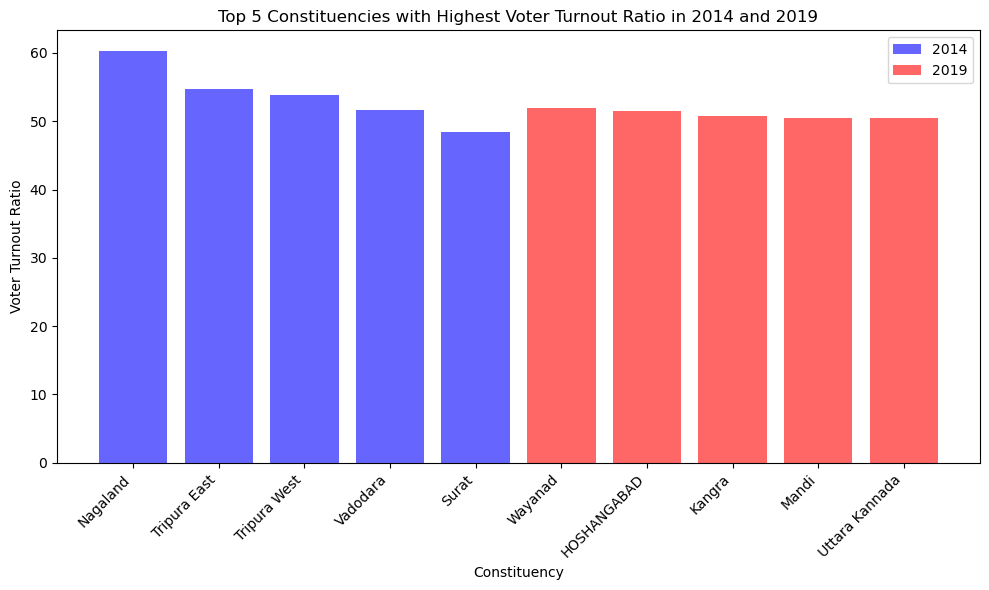

In [99]:
# 1. Bar Chart: Top 5 Constituencies with Highest Voter Turnout Ratio in 2014 and 2019
top_5_constituencies_2014 = df[df['year'] == 2014].nlargest(5, 'voter_turnout_ratio')
top_5_constituencies_2019 = df[df['year'] == 2019].nlargest(5, 'voter_turnout_ratio')
plt.figure(figsize=(10, 6))
plt.bar(top_5_constituencies_2014['pc_name'], top_5_constituencies_2014['voter_turnout_ratio'], color='blue', alpha=0.6, label='2014')
plt.bar(top_5_constituencies_2019['pc_name'], top_5_constituencies_2019['voter_turnout_ratio'], color='red', alpha=0.6, label='2019')
plt.xlabel('Constituency')
plt.ylabel('Voter Turnout Ratio')
plt.title('Top 5 Constituencies with Highest Voter Turnout Ratio in 2014 and 2019')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

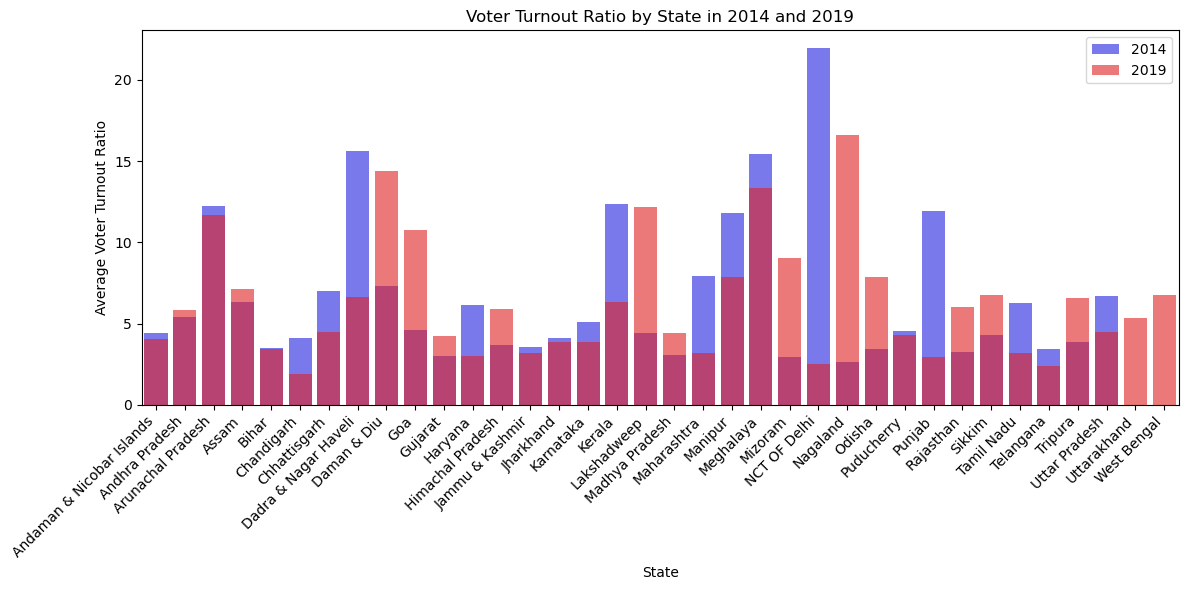

In [100]:
# 2. Bar Chart: Voter Turnout Ratio by State in 2014 and 2019
voter_turnout_by_state_2014 = df[df['year'] == 2014].groupby('state')['voter_turnout_ratio'].mean()
voter_turnout_by_state_2019 = df[df['year'] == 2019].groupby('state')['voter_turnout_ratio'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=voter_turnout_by_state_2014.index, y=voter_turnout_by_state_2014.values, color='blue', alpha=0.6, label='2014')
sns.barplot(x=voter_turnout_by_state_2019.index, y=voter_turnout_by_state_2019.values, color='red', alpha=0.6, label='2019')
plt.xlabel('State')
plt.ylabel('Average Voter Turnout Ratio')
plt.title('Voter Turnout Ratio by State in 2014 and 2019')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

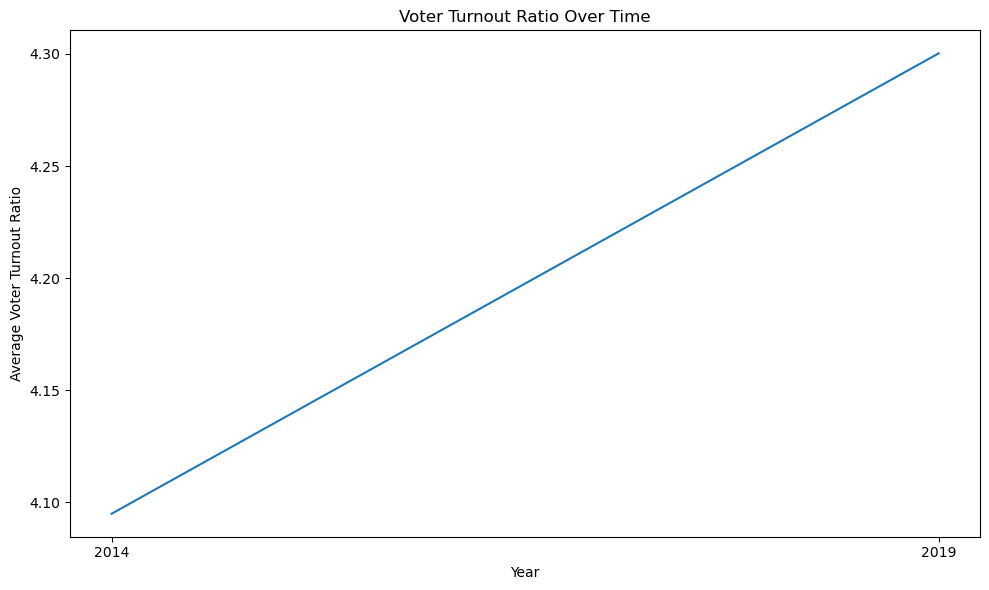

In [101]:
#Line Plot: Voter Turnout Ratio Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='voter_turnout_ratio', estimator='mean', ci=None)
plt.xlabel('Year')
plt.ylabel('Average Voter Turnout Ratio')
plt.title('Voter Turnout Ratio Over Time')
plt.xticks(df['year'].unique())
plt.tight_layout()
plt.show()

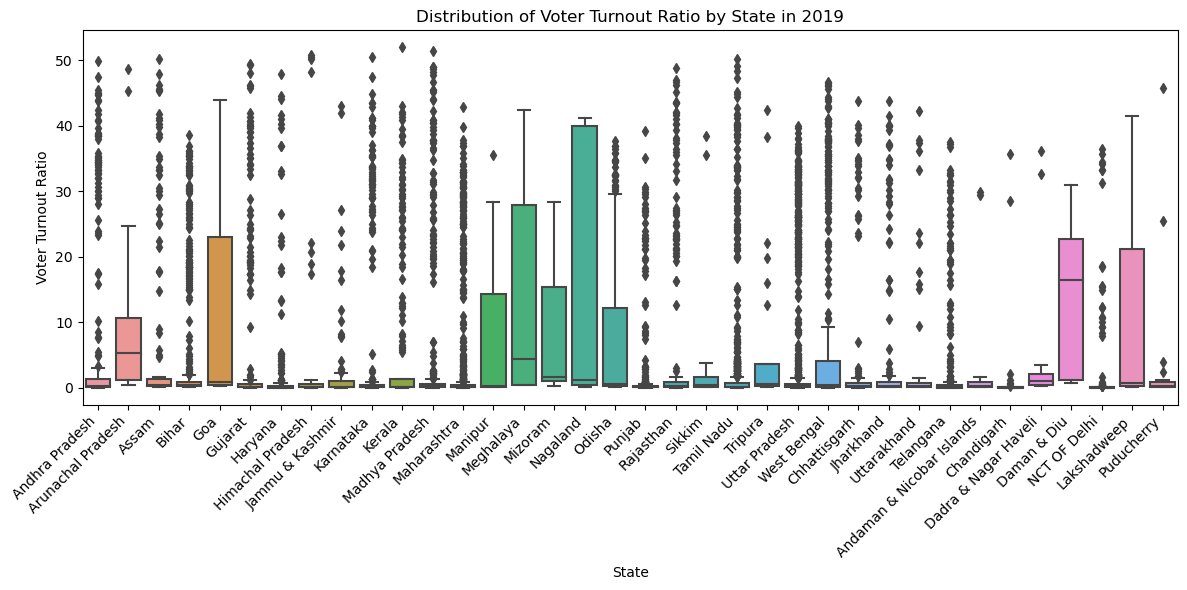

In [102]:
# Box Plot: Distribution of Voter Turnout Ratio by State in 2019
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['year'] == 2019], x='state', y='voter_turnout_ratio')
plt.xlabel('State')
plt.ylabel('Voter Turnout Ratio')
plt.title('Distribution of Voter Turnout Ratio by State in 2019')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

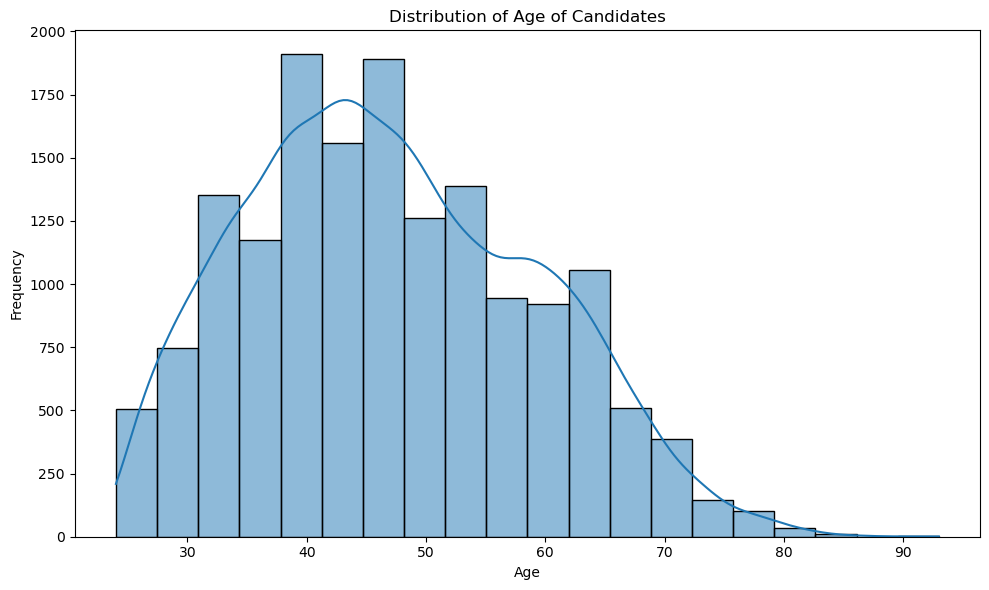

In [104]:
# Histogram: Distribution of Age of Candidates
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age of Candidates')
plt.tight_layout()
plt.show()

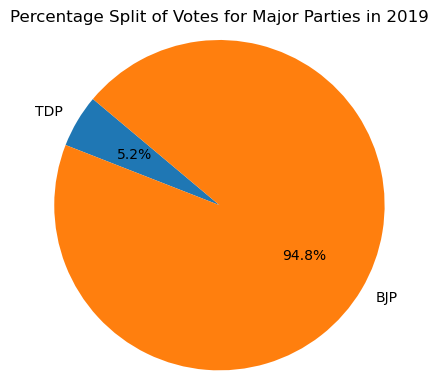

In [120]:
#Pie Chart: Percentage Split of Votes for Major Parties in 2019:
major_parties = ['TDP', 'BJP']  # Replace with actual major party names
party_votes_2019 = df[df['year'] == 2019].groupby('party')['total_votes'].sum().loc[major_parties]

plt.figure(figsize=(4, 4))
plt.pie(party_votes_2019, labels=party_votes_2019.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Split of Votes for Major Parties in 2019')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

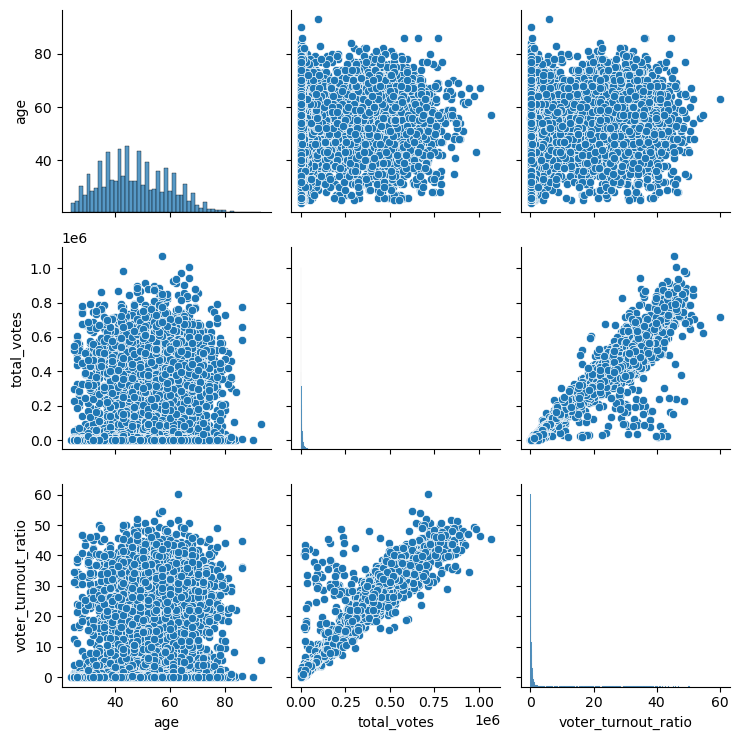

In [105]:
# Pair Plot: Pairwise Relationships between Numerical Variables
sns.pairplot(df[['age', 'total_votes', 'voter_turnout_ratio']], kind='scatter')
plt.tight_layout()
plt.show()

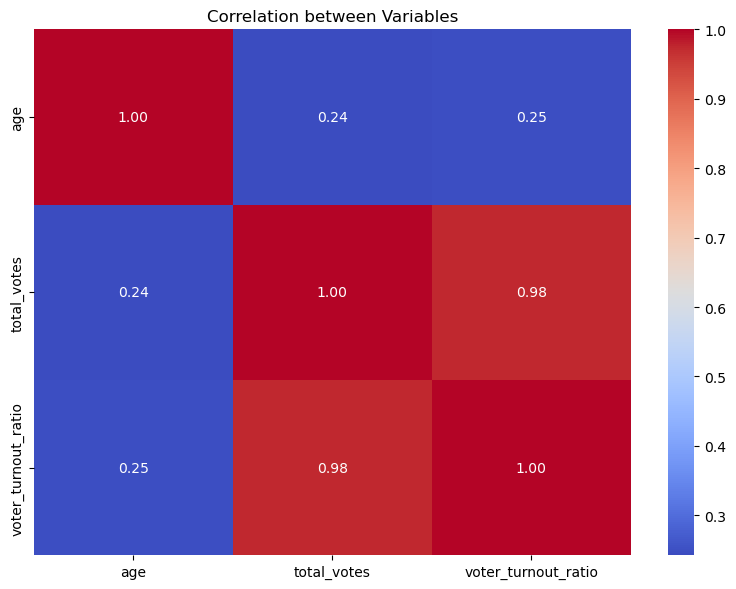

In [107]:
# Heatmap: Correlation between Variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'total_votes', 'voter_turnout_ratio']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Variables')
plt.tight_layout()
plt.show()


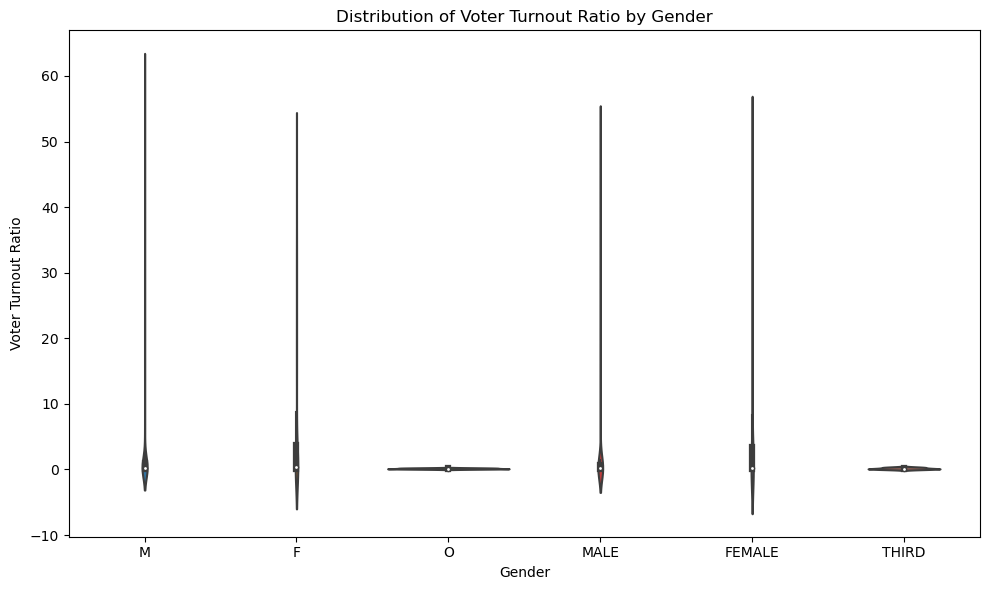

In [110]:
# Violin Plot: Distribution of Voter Turnout Ratio by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='sex', y='voter_turnout_ratio')
plt.xlabel('Gender')
plt.ylabel('Voter Turnout Ratio')
plt.title('Distribution of Voter Turnout Ratio by Gender')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

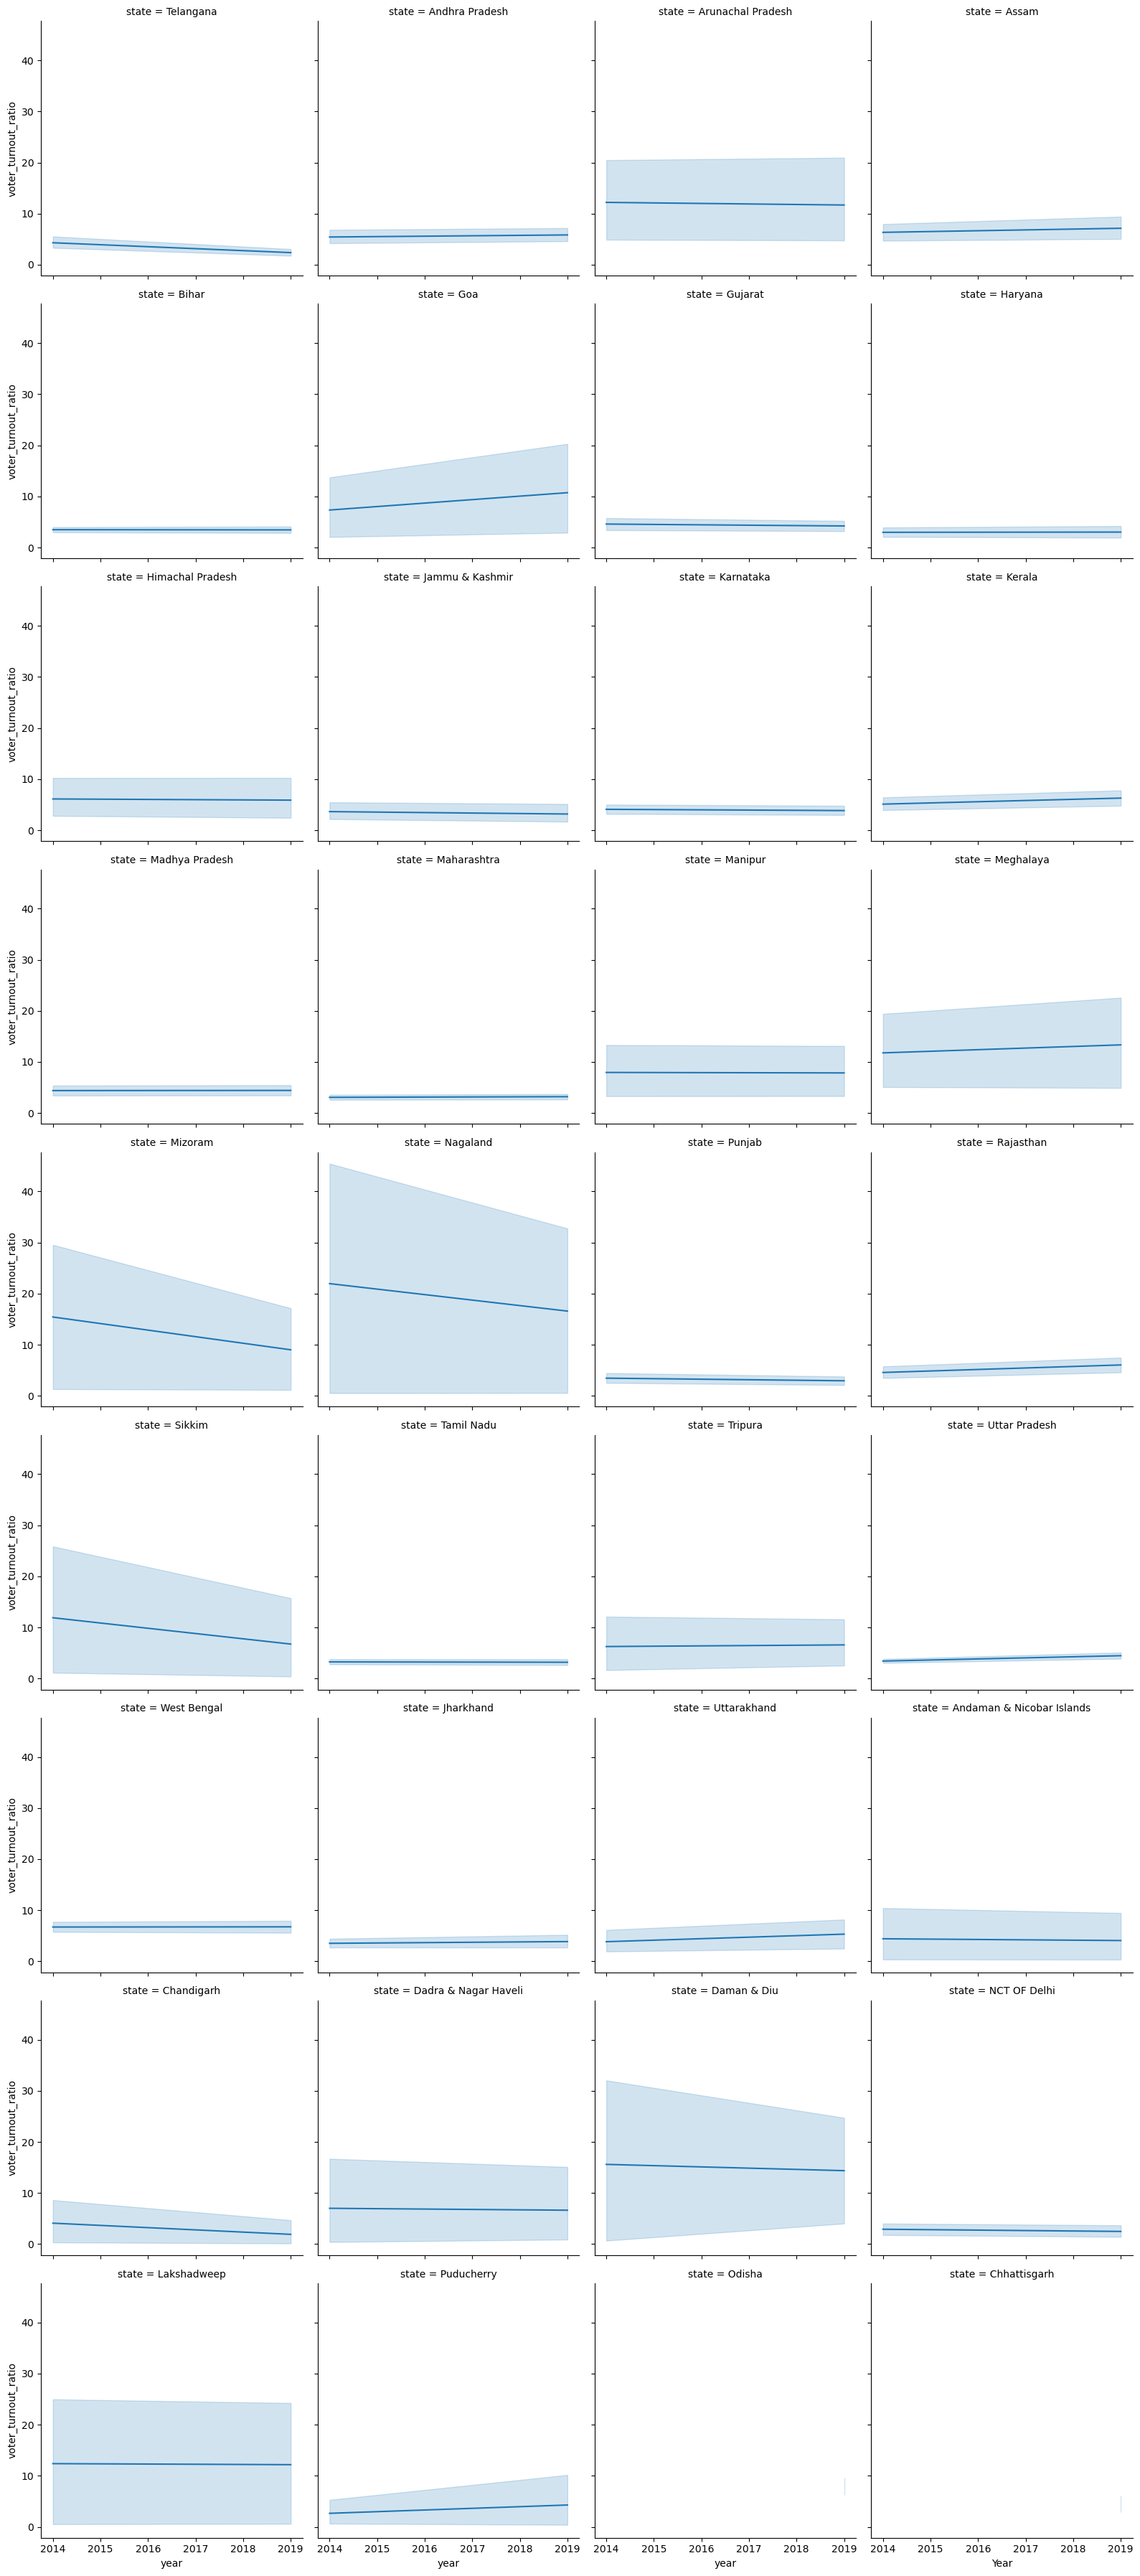

In [111]:
# Facet Grid: Voter Turnout Ratio by State and Year
plt.figure(figsize=(12, 8))
sns.FacetGrid(df, col='state', col_wrap=4, height=4).map(sns.lineplot, 'year', 'voter_turnout_ratio')
plt.xlabel('Year')
plt.ylabel('Voter Turnout Ratio')
plt.tight_layout()
plt.show()